In [1]:
#Basic AstroCV example 3
#Detect galaxies on Nasa downloaded image
#Ratio matters: Optimal image ratio = 4:3


import sys     
import pyyolo
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time
import urllib
import os.path

In [2]:
if sys.version_info[0] >= 3:
    from urllib.request import urlretrieve
else:
    # Not Python 3 - today, it is most likely to be Python 2
    # But note that this might need an update when Python 4
    # might be around one day
    from urllib import urlretrieve
    
## This code imports urlretrieve from the right library, since they're different for Python versions 2 and  3
    
##code from https://stackoverflow.com/questions/17960942/attributeerror-module-object-has-no-attribute-urlretrieve

In [3]:
darknet_path = './data/darknet' #darknet path
datacfg = '../sdss.data' #relative to darknet path
cfgfile = '../sdss.cfg' #relative to darknet path
weightfile = '/mnt/data/astrocv/galaxy_sdss_hic.weights'
filename = 'writable/tempImageDownload.jpg' #relative to galaxy_detection path
#url = "https://www.nasa.gov/sites/default/files/thumbnails/image/hubble_friday_03112016.jpg" #square image
#url = "http://wwwcdn.skyandtelescope.com/wp-content/uploads/a-galaxy-cluster-1.jpg" #tall image

url = "https://i.kinja-img.com/gawker-media/image/upload/s--RkydXzP0--/c_scale,fl_progressive,q_80,w_800/t4eipzajwxxfp3retytv.jpg" #wide image
if not os.path.isfile(filename):
    urlretrieve(url,filename)
thresh = 0.02  #detection threshold try 0.02 & 0.1
hier_thresh = 0.5

In [4]:
##Here we'll crop the image to a good image ratio. The following code crops images with ratio >1 and <1.
##It won't crop the image if the ratio is ~4:3
##Here you can see the original image and then the cropped image

img = Image.open(filename)
width, height = img.size
ratio=width/height

cropped = False
if abs(ratio-(4/3))>0.05:
        cropped = True
        if ratio<=(4/3):
                fheight=int(width*(3/4))
                img2 = img.crop((0, 0, width, fheight))
        else:
                fwidth = int(height*4/3)
                img2 = img.crop((0, 0, fwidth, height))
         
        img2.save("writable/tempImageDownload2.jpg")
        filename2="writable/tempImageDownload2.jpg"
        
        

In [5]:
t1=time.time()
pyyolo.init(darknet_path, datacfg, cfgfile, weightfile) #init and load network
print('Initialization time = %5.3f seconds'%(time.time()-t1))
t1=time.time()
outputs = pyyolo.test(filename, thresh, hier_thresh, 0) #load image and process
print('Image processing time = %5.3f seconds'%(time.time()-t1))

asd=0

for output in outputs:
        asd+=1
        print(output)
        
print("%d images detected"%asd)
pyyolo.cleanup()


Initialization time = 4.975 seconds
Image processing time = 0.374 seconds
{'class': 'Elliptical ', 'top': 11, 'left': 0, 'prob': 0.07556445896625519, 'right': 13, 'bottom': 32}
{'class': 'Elliptical ', 'top': 11, 'left': 522, 'prob': 0.02076633833348751, 'right': 540, 'bottom': 24}
{'class': 'Edge-on', 'top': 46, 'left': 188, 'prob': 0.05765557289123535, 'right': 207, 'bottom': 62}
{'class': 'Elliptical ', 'top': 28, 'left': 329, 'prob': 0.2061178982257843, 'right': 353, 'bottom': 49}
{'class': 'Elliptical ', 'top': 42, 'left': 520, 'prob': 0.04312441125512123, 'right': 539, 'bottom': 58}
{'class': 'Elliptical ', 'top': 41, 'left': 563, 'prob': 0.023790068924427032, 'right': 574, 'bottom': 51}
{'class': 'Elliptical ', 'top': 65, 'left': 266, 'prob': 0.08392108231782913, 'right': 277, 'bottom': 74}
{'class': 'Edge-on', 'top': 58, 'left': 393, 'prob': 0.05833298712968826, 'right': 411, 'bottom': 76}
{'class': 'Elliptical ', 'top': 94, 'left': 172, 'prob': 0.09467541426420212, 'right': 18

In [6]:
##Here we process the cropped image, if cropped

if cropped:
    t2=time.time()
    pyyolo.init(darknet_path, datacfg, cfgfile, weightfile) #init and load network
    print('Initialization time = %5.3f seconds'%(time.time()-t2))
    t2=time.time()
    outputs2 = pyyolo.test(filename2, thresh, hier_thresh, 0) #load image and process
    print('Image processing time = %5.3f seconds'%(time.time()-t2))

    asd=0

    for output in outputs2:
            asd+=1
            print(output)

    print("%d images detected"%asd)
    pyyolo.cleanup()

Initialization time = 4.084 seconds
Image processing time = 0.308 seconds
{'class': 'Elliptical ', 'top': 6, 'left': 516, 'prob': 0.02651919424533844, 'right': 532, 'bottom': 20}
{'class': 'Elliptical ', 'top': 4, 'left': 533, 'prob': 0.03301273658871651, 'right': 545, 'bottom': 14}
{'class': 'Edge-on', 'top': 46, 'left': 190, 'prob': 0.05031651258468628, 'right': 205, 'bottom': 60}
{'class': 'Edge-on', 'top': 31, 'left': 332, 'prob': 0.03287700191140175, 'right': 352, 'bottom': 50}
{'class': 'Elliptical ', 'top': 43, 'left': 520, 'prob': 0.05306952819228172, 'right': 538, 'bottom': 59}
{'class': 'Elliptical ', 'top': 40, 'left': 568, 'prob': 0.20594197511672974, 'right': 577, 'bottom': 50}
{'class': 'Elliptical ', 'top': 61, 'left': 268, 'prob': 0.028030594810843468, 'right': 278, 'bottom': 72}
{'class': 'Unknown', 'top': 61, 'left': 391, 'prob': 0.02955080009996891, 'right': 409, 'bottom': 79}
{'class': 'Elliptical ', 'top': 90, 'left': 173, 'prob': 0.08749042451381683, 'right': 186,

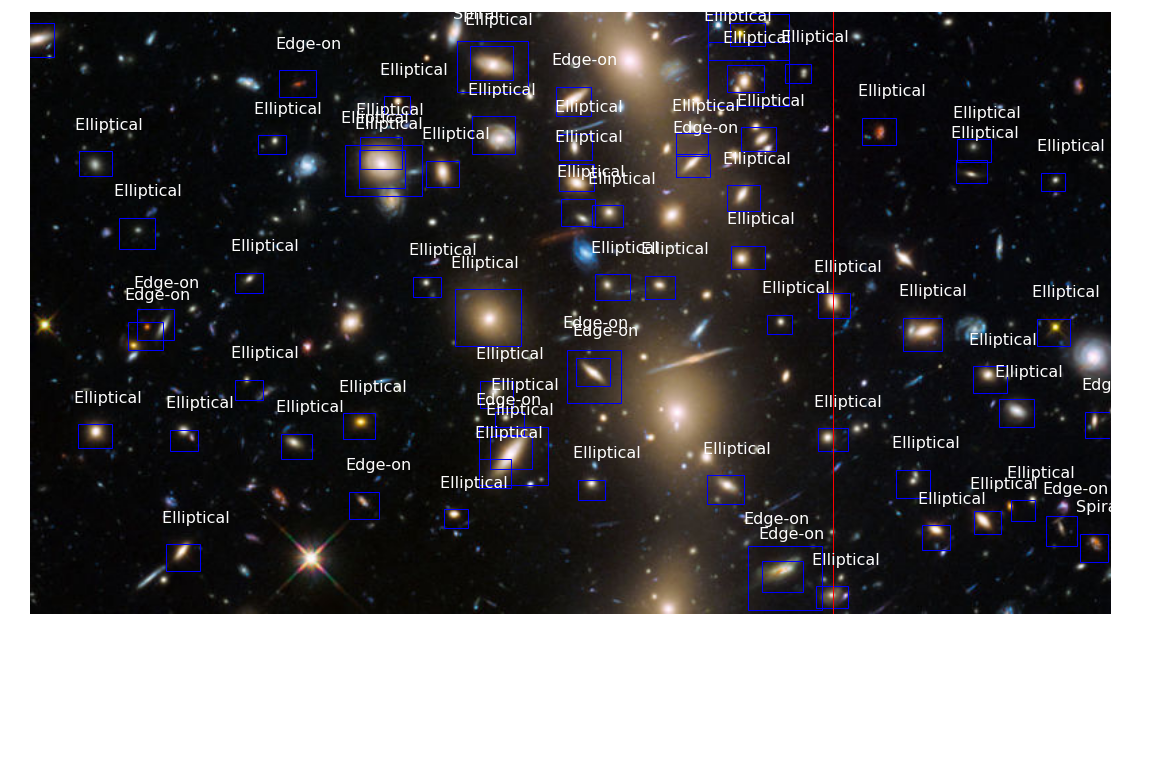

In [7]:
#plot image and detections
img = Image.open(filename)
contrast = ImageEnhance.Contrast(img)
img2 = contrast.enhance(1)
fig,ax = plt.subplots(figsize=(15,12))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(img2)
ax.set_aspect('equal')

inliers = 0
for output in outputs:
        r=output['right']
        l=output['left']
        t=output['top']
        b=output['bottom']
        if cropped:
                if width/height<4/3:
                        if b<fheight:
                                inliers+=1
                else:
                        if r<fwidth:
                                inliers+=1

                                
                                
        rect = patches.Rectangle((l-4,t-3),r-l+8,b-t+4,linewidth=1,edgecolor='b',facecolor='none')      
        ax.add_patch(rect)
        ax.annotate(output['class'],(l-7,t-19),color='w',fontsize=16)
        


if cropped:
        if width/height<4/3:
                plt.axhline(fheight,color='red')
        else:
                plt.axvline(fwidth,color='red')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0) 
plt.show()


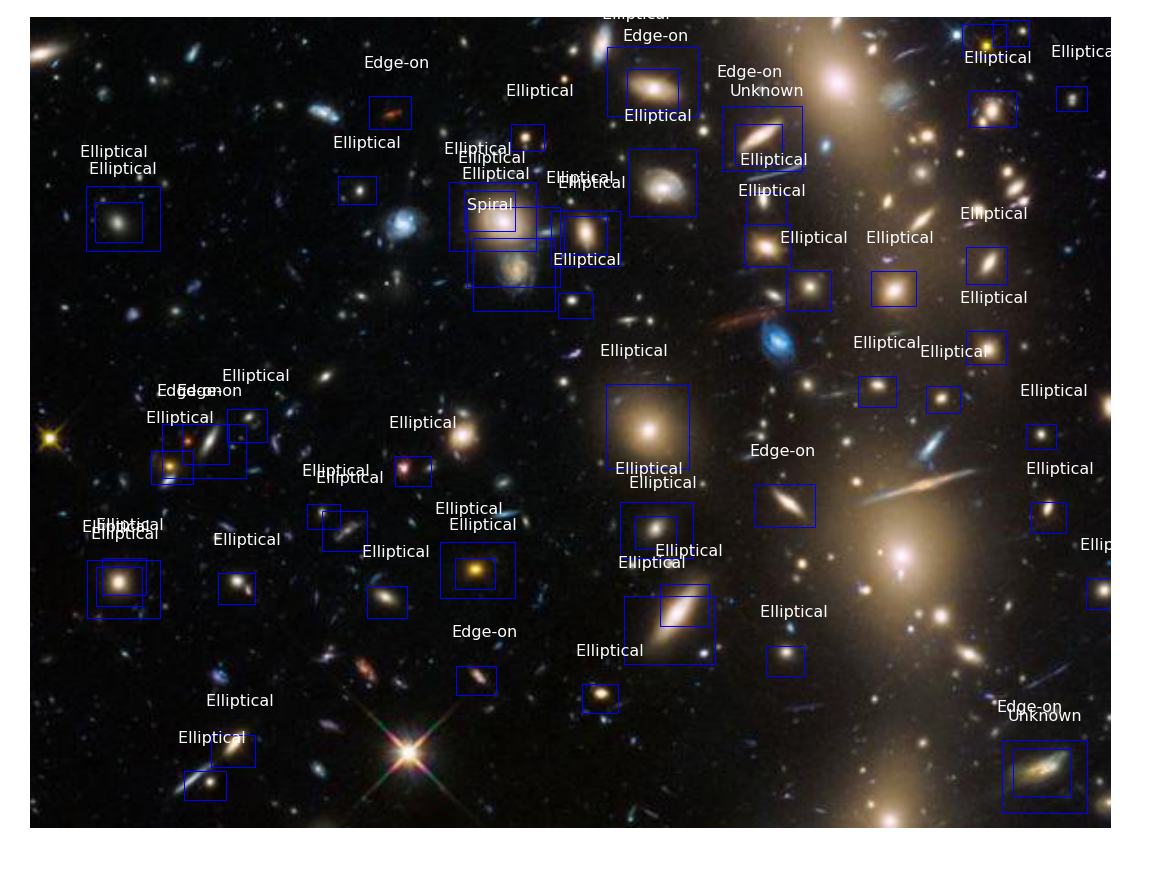

In [8]:
#plot image and detections
img = Image.open(filename2)
contrast = ImageEnhance.Contrast(img)
img2 = contrast.enhance(1)
fig,ax = plt.subplots(figsize=(15,12))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(img2)
ax.set_aspect('equal')


for output in outputs2:
        r=output['right']
        l=output['left']
        t=output['top']
        b=output['bottom']
           
        rect = patches.Rectangle((l-4,t-3),r-l+8,b-t+4,linewidth=1,edgecolor='b',facecolor='none')      
        ax.add_patch(rect)
        ax.annotate(output['class'],(l-7,t-19),color='w',fontsize=16)
        


plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0) 
plt.show()

In [9]:
print("In the raw image, %d galaxies were found in the area to be cropped"%inliers)
print("In the cropped image, %d galaxies were found"%asd )

In the raw image, 55 galaxies were found in the area to be cropped
In the cropped image, 59 galaxies were found


In [10]:
os.remove("writable/tempImageDownload.jpg")
os.remove("writable/tempImageDownload2.jpg")
##deletes temp images after downloading

In [11]:
%%javascript
IPython.notebook.kernel.restart();

<IPython.core.display.Javascript object>